In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test_master.csv")
y_test = test["RUL"]

In [3]:
train

,Unnamed: 0,vehicleId,days,ecoMode,cityMode,sportMode,s1,s2,s3,s4,...,s14,s15,s16,s17,s18,s19,s20,s21,RUL,Response
0,0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,...,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,191,0
1,1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,...,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,190,0
2,2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,...,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,189,0
3,3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,...,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,188,0
4,4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,...,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,20626,100,196,-0.0004,-0.0003,100,518.67,643.49,1597.98,1428.63,...,8137.60,8.4956,0.03,397,2388,100,38.49,22.9735,4,1
20627,20627,100,197,-0.0016,-0.0005,100,518.67,643.54,1604.50,1433.58,...,8136.50,8.5139,0.03,395,2388,100,38.30,23.1594,3,1
20628,20628,100,198,0.0004,0.0000,100,518.67,643.42,1602.46,1428.18,...,8141.05,8.5646,0.03,398,2388,100,38.44,22.9333,2,1
20629,20629,100,199,-0.0011,0.0003,100,518.67,643.23,1605.26,1426.53,...,8139.29,8.5389,0.03,395,2388,100,38.29,23.0640,1,1


In [4]:
train = train.drop(["Unnamed: 0","RUL","Response"],axis=1)

In [5]:
train = train.rename(columns={"vehicleId":"unit_nr","days":"time_cycles"})

In [6]:
train.columns

Index(['unit_nr', 'time_cycles', 'ecoMode', 'cityMode', 'sportMode', 's1',
       's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12',
       's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21'],
      dtype='object')

In [7]:
test

,vehicleId,days,ecoMode,cityMode,sportMode,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,31,-0.0006,0.0004,100,518.67,642.58,1581.22,1398.91,14.62,...,2388.06,8130.11,8.4024,0.03,393,2388,100,38.81,23.3552,112
1,2,49,0.0018,-0.0001,100,518.67,642.55,1586.59,1410.83,14.62,...,2388.09,8126.90,8.4505,0.03,391,2388,100,38.81,23.2618,98
2,3,126,-0.0016,0.0004,100,518.67,642.88,1589.75,1418.89,14.62,...,2388.14,8131.46,8.4119,0.03,395,2388,100,38.93,23.2740,69
3,4,106,0.0012,0.0004,100,518.67,642.78,1594.53,1406.88,14.62,...,2388.11,8133.64,8.4634,0.03,395,2388,100,38.58,23.2581,82
4,5,98,-0.0013,-0.0004,100,518.67,642.27,1589.94,1419.36,14.62,...,2388.15,8125.74,8.4362,0.03,394,2388,100,38.75,23.4117,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,97,-0.0006,0.0003,100,518.67,642.30,1590.88,1397.94,14.62,...,2388.01,8148.24,8.4110,0.03,391,2388,100,38.96,23.4606,137
96,97,134,0.0013,-0.0001,100,518.67,642.59,1582.96,1410.92,14.62,...,2388.06,8155.48,8.4500,0.03,395,2388,100,38.61,23.2953,82
97,98,121,0.0017,0.0001,100,518.67,642.68,1599.51,1415.47,14.62,...,2388.09,8146.39,8.4235,0.03,394,2388,100,38.76,23.3608,59
98,99,97,0.0047,0.0000,100,518.67,642.00,1585.03,1397.98,14.62,...,2388.02,8150.38,8.4003,0.03,391,2388,100,38.95,23.3595,117


In [9]:
test = test.drop(["RUL"],axis=1)
test = test.rename(columns={"vehicleId":"unit_nr","days":"time_cycles"})

In [10]:
y_test

0     112
1      98
2      69
3      82
4      91
     ... 
95    137
96     82
97     59
98    117
99     20
Name: RUL, Length: 100, dtype: int64

In [11]:
index_names = ['unit_nr','time_cycles']
setting_names = ['ecoMode','cityMode','sportMode']
sensor_names = ['s{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

In [12]:
train[index_names].describe()

,unit_nr,time_cycles
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [13]:
train[index_names].groupby('unit_nr').max().describe()

,time_cycles
count,100.000000
mean,206.310000
std,46.342749
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,362.000000


In [14]:
train[setting_names].describe()

,ecoMode,cityMode,sportMode
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


In [15]:
train[sensor_names].describe()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [16]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame
  
train = add_remaining_useful_life(train)
train[index_names+['RUL']].head()

,unit_nr,time_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


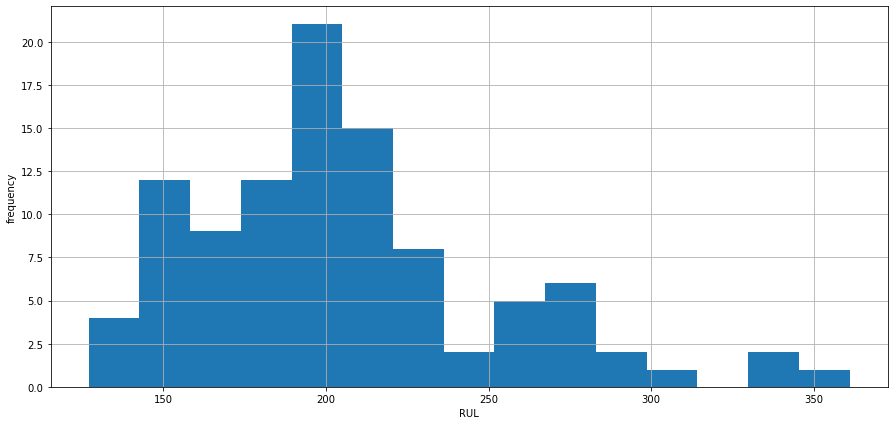

In [17]:
df_max_rul = train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

In [18]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train['unit_nr'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', sensor_name, 
                     data=train[train['unit_nr']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

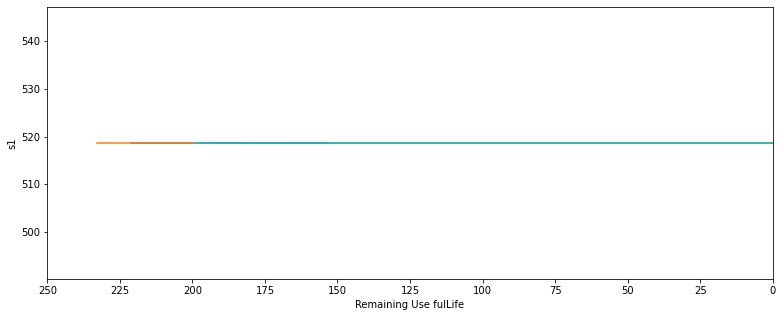

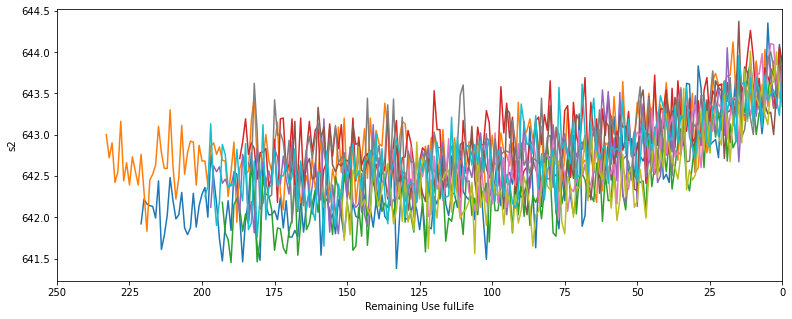

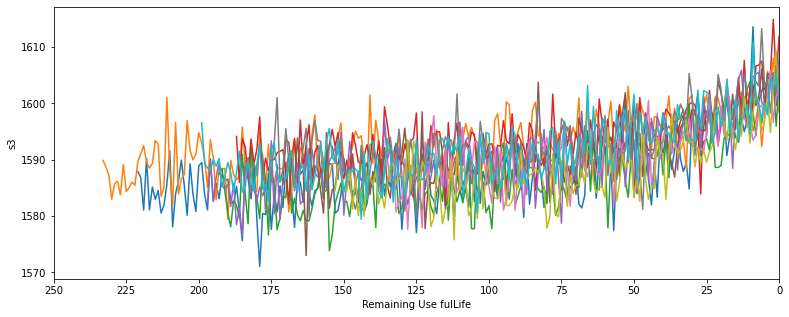

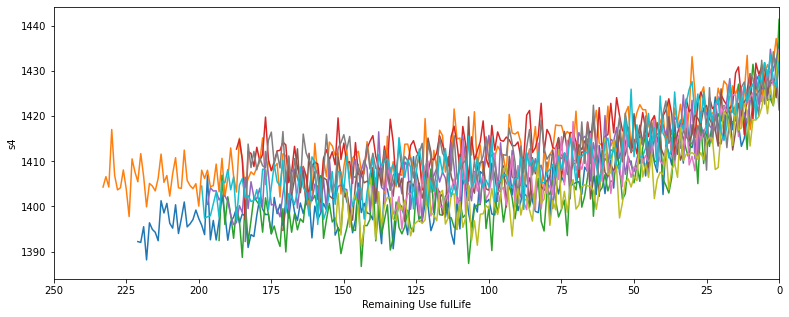

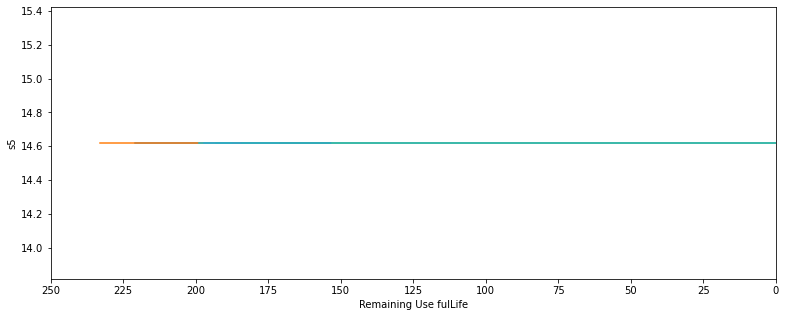

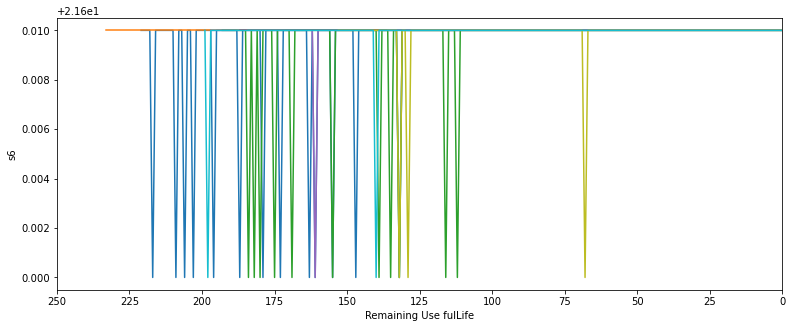

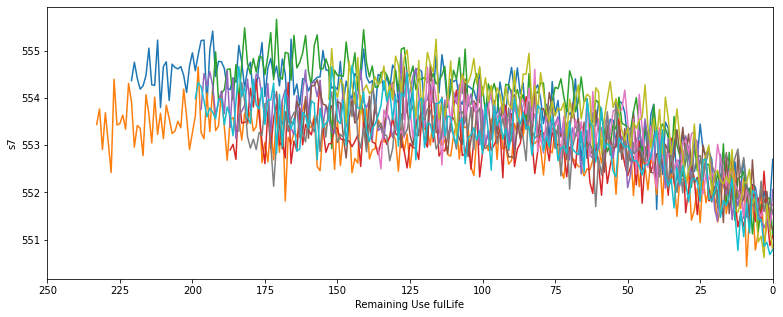

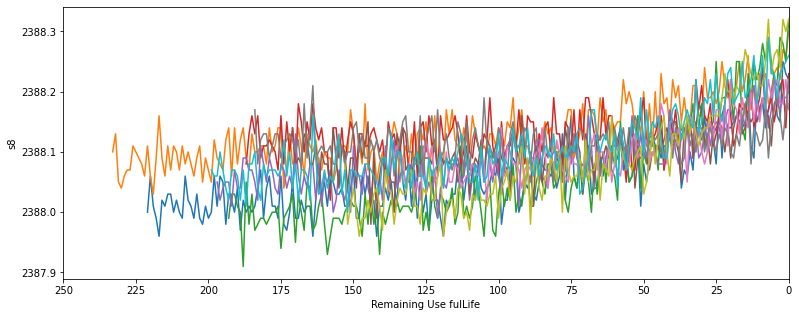

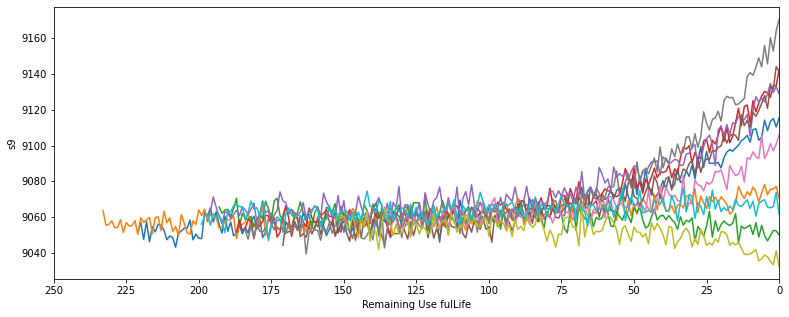

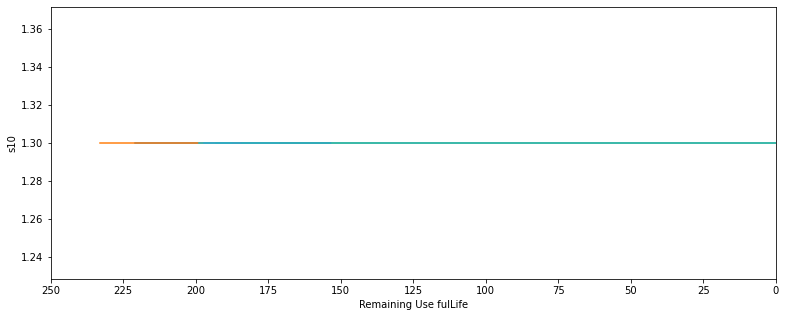

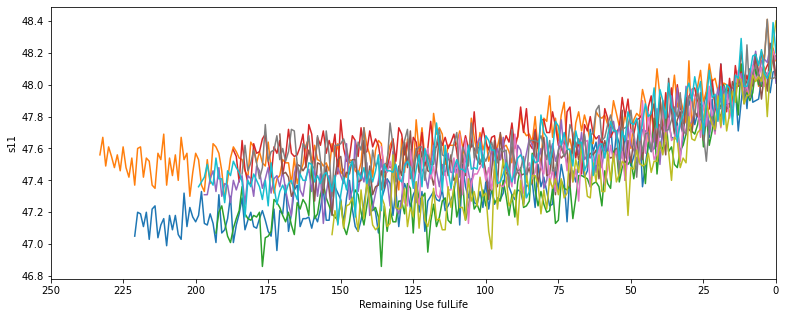

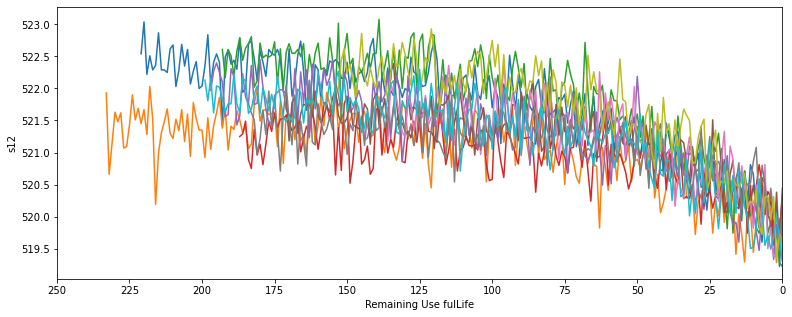

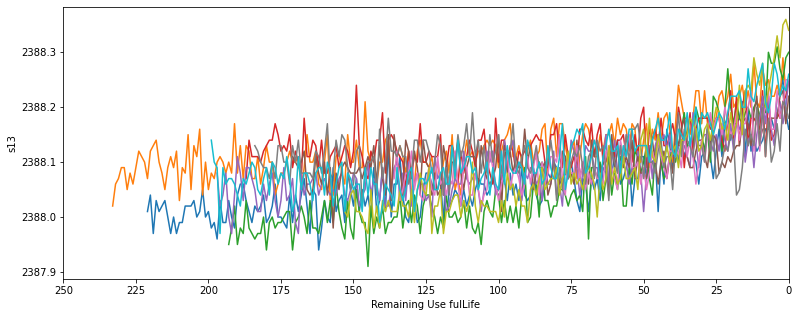

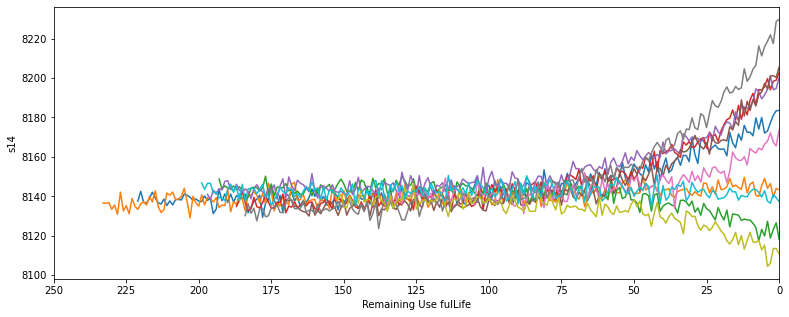

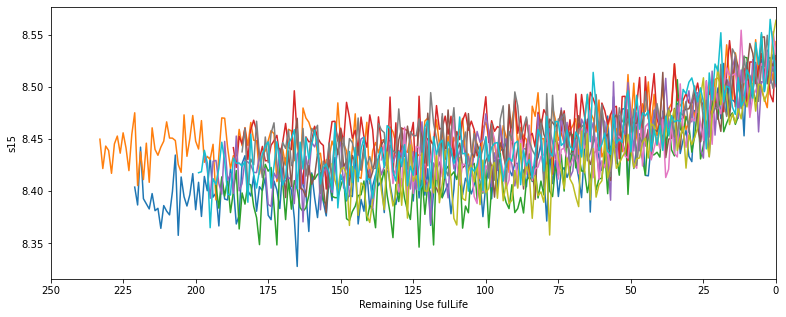

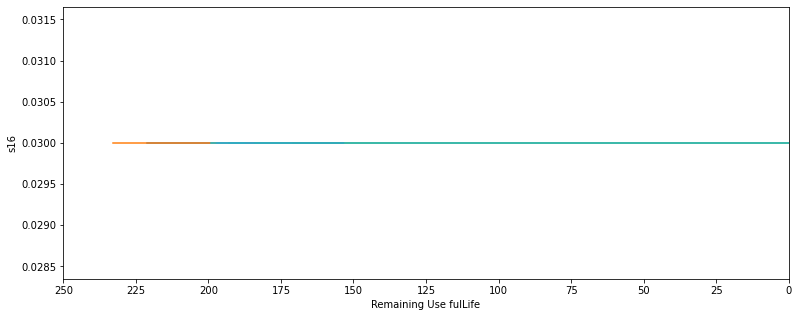

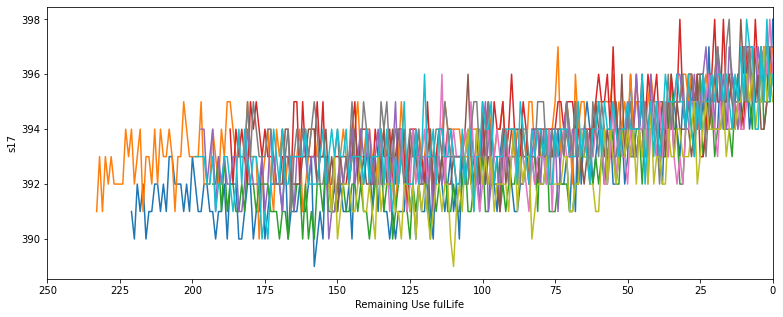

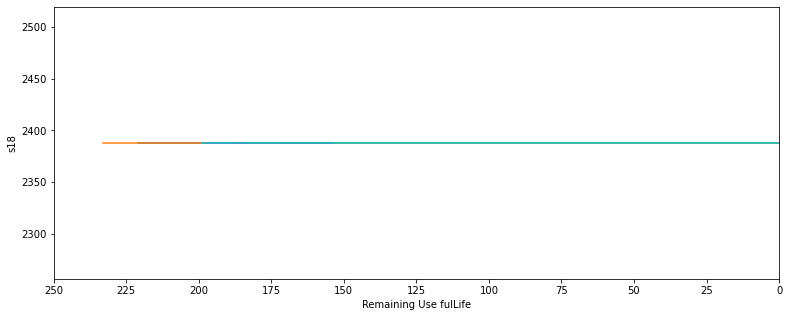

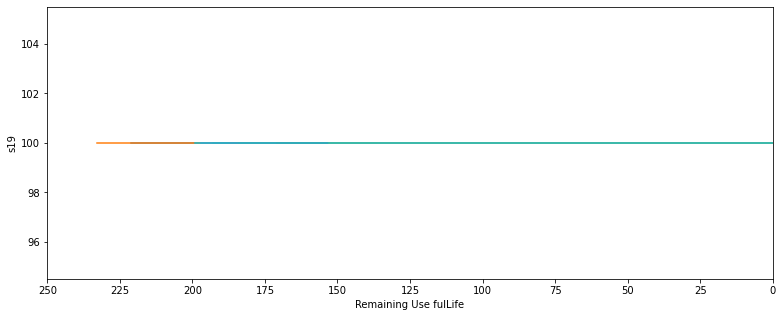

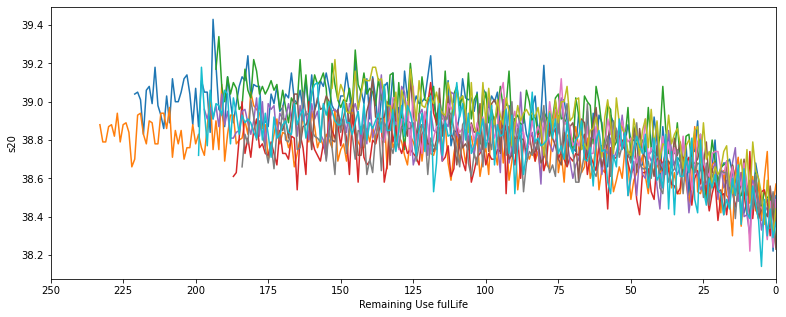

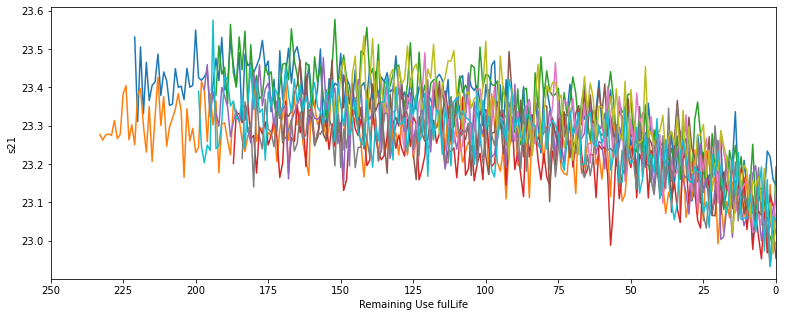

In [19]:
for sensor_name in sensor_names:
    plot_sensor(sensor_name)

In [20]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [21]:
drop_sensors = ['s1','s5','s6','s10','s16','s18','s19']
drop_labels = index_names+setting_names+drop_sensors

X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')

# Since the true RUL values for the test set are only provided for the last time cycle of each enginge, 
# the test set is subsetted to represent the same
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

In [22]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:44.668191595454275, R2:0.5794486527796765
test set RMSE:31.95263302774228, R2:0.40877368076572373


In [23]:
## Clipped RUL 
y_train_clipped = y_train.clip(upper=125)

# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train_clipped)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:21.491018701514893, R2:0.7340432868050576
test set RMSE:21.90021340689134, R2:0.7222608196546032


# svm

In [25]:
from sklearn.svm import SVR

In [26]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train_clipped)

# predict and evaluate
y_hat_train = svr.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:29.57783070266026, R2:0.49623314435506494
test set RMSE:29.675150117440094, R2:0.49005151605390174


In [27]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM regression + clipped RUL + scaled
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train_clipped)

# predict and evaluate
y_hat_train = svr.predict(X_train_scaled)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_scaled)
evaluate(y_test, y_hat_test)

train set RMSE:21.578263975067895, R2:0.731879539697963
test set RMSE:21.580480163289515, R2:0.7303113540952181


# Feature enginering

In [28]:
from sklearn.preprocessing import PolynomialFeatures
# 2nd degree polynomialFeatures of [a, b] becomes [1, a, b, a^2, ab, b^2]
poly = PolynomialFeatures(2)
X_train_transformed = poly.fit_transform(X_train_scaled)
X_test_transformed = poly.fit_transform(X_test_scaled)

print(X_train_scaled.shape)
print(X_train_transformed.shape)

(20631, 14)
(20631, 120)


In [29]:
# SVM regression + clipped RUL + engineered features
svr_f = SVR(kernel='linear')
svr_f.fit(X_train_transformed, y_train_clipped)

# predict and evaluate
y_hat_train = svr_f.predict(X_train_transformed)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr_f.predict(X_test_transformed)
evaluate(y_test, y_hat_test)

train set RMSE:19.716789731130817, R2:0.7761436785704148
test set RMSE:20.585402508369945, R2:0.7546086882115455


# feature selection

In [30]:
# Feature engineering + selection
from sklearn.feature_selection import SelectFromModel
select_features = SelectFromModel(svr_f, threshold='mean', prefit=True)
select_features.get_support()
feature_names = poly.get_feature_names()

print('Original features:\n', X_train.columns)
print('Best features:\n', np.array(feature_names)[select_features.get_support()])
np.array(feature_names)[select_features.get_support()].shape

Original features:
 Index(['s2', 's3', 's4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15',
       's17', 's20', 's21'],
      dtype='object')
Best features:
 ['x0' 'x1' 'x2' 'x3' 'x5' 'x6' 'x7' 'x9' 'x10' 'x11' 'x12' 'x13' 'x2 x5'
 'x2 x8' 'x2 x9' 'x3 x5' 'x3 x8' 'x3 x9' 'x4^2' 'x4 x6' 'x4 x7' 'x4 x8'
 'x5^2' 'x5 x6' 'x5 x7' 'x5 x9' 'x5 x12' 'x5 x13' 'x6^2' 'x6 x8' 'x6 x9'
 'x7 x8' 'x7 x9' 'x8^2' 'x9^2' 'x9 x12' 'x9 x13']


(37,)

In [31]:
# SVM regression + clipped RUL + engineered features + selection
svr = SVR(kernel='linear')
svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)

# predict and evaluate
y_hat_train = svr.predict(X_train_transformed[:, select_features.get_support()])
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_transformed[:, select_features.get_support()])
evaluate(y_test, y_hat_test)

train set RMSE:19.746789101481117, R2:0.7754619593165272
test set RMSE:20.55613819605467, R2:0.7553058913450688


# Selecting our final model

In [32]:
epsilon = [0.4, 0.3, 0.2, 0.1, 0.05]

for e in epsilon:
    svr = SVR(kernel='linear', epsilon=e)
    svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)
    
    # predict and evaluate
    y_hat = svr.predict(X_train_transformed[:, select_features.get_support()])
    mse = mean_squared_error(y_train_clipped, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_train_clipped, y_hat)
    print("epsilon:", e, "RMSE:", rmse, "R2:", variance)

epsilon: 0.4 RMSE: 19.74772556660334 R2: 0.7754406619776466
epsilon: 0.3 RMSE: 19.747580761069823 R2: 0.7754439552496153
epsilon: 0.2 RMSE: 19.7466000781717 R2: 0.7754662580123994
epsilon: 0.1 RMSE: 19.746789101481117 R2: 0.7754619593165272
epsilon: 0.05 RMSE: 19.746532456983992 R2: 0.7754677958176172


In [33]:
svr = SVR(kernel='linear', epsilon=0.2)
svr.fit(X_train_transformed[:, select_features.get_support()], y_train_clipped)

# predict and evaluate
y_hat_train = svr.predict(X_train_transformed[:, select_features.get_support()])
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = svr.predict(X_test_transformed[:, select_features.get_support()])
evaluate(y_test, y_hat_test)

train set RMSE:19.7466000781717, R2:0.7754662580123994
test set RMSE:20.54412482077375, R2:0.7555918150093486
